In [2]:
import numpy as np
import pandas as pd
import re

def prepare():
    df = pd.read_csv('NYC_Bicycle_Counts_2016_Corrected.csv')
    df.Precipitation.replace('(T)','0',regex=True, inplace = True)
    df.Precipitation.replace('(\DS\D)','',regex=True, inplace = True)
    df.replace('(,)','',regex=True, inplace = True)
    df.replace('(\sBridge)','',regex=True, inplace = True)
    df = df.rename(columns={'Brooklyn Bridge': 'Brooklyn'})
    df = df.rename(columns={'Manhattan Bridge': 'Manhattan'})
    df = df.rename(columns={'Queensboro Bridge': 'Queensboro'})
    df = df.rename(columns={'Williamsburg Bridge': 'Williamsburg'})
    i =[i for i in df.columns]
    for j in i:
        if (j != ('Date')) and (j != ('Day')):
    
            df[j] = df[j].astype(float)
   # print (df.dtypes)
    return df
    

In [31]:
if __name__ == '__main__':
    df = prepare()
    #intro(df)
    three = df[['Brooklyn', 'Manhattan','Queensboro','Williamsburg']]
    
    prob3(three)
    prob3(df[['Brooklyn']])
    prob3(df[['Manhattan']])
    prob3(df[['Queensboro']])
    prob3(df[['Williamsburg']])
    prob3(df[['Brooklyn', 'Manhattan','Queensboro']])
    prob3(df[[ 'Manhattan','Queensboro','Williamsburg']])
    prob3(df[['Brooklyn', 'Queensboro','Williamsburg']])
    prob3(df[['Brooklyn', 'Manhattan','Williamsburg']])
    prob3(df[['Total']])
    

Index(['Brooklyn', 'Manhattan', 'Queensboro', 'Williamsburg'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 90.65420560747664
Index(['Brooklyn'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 98.13084112149532
Index(['Manhattan'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 98.13084112149532
Index(['Queensboro'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 98.13084112149532
Index(['Williamsburg'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 98.13084112149532
Index(['Brooklyn', 'Manhattan', 'Queensboro'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 92.5233644859813
Index(['Manhattan', 'Queensboro', 'Williamsburg'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 93.45794392523365
Index(['Brooklyn', 'Queensboro', 'Williamsburg'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 92.5233644859813
Index(['Brooklyn', 'Manhattan', 'Williamsburg'], dtype='object') Gaussian Naive Bayes mo

Describe the features, measurement units, number of samples, range of features, and source of the dataset used in the project in one paragraph.

In [260]:
def intro(df):
    print("Features are",[i for i in df.columns])
    print("\nUnits for High Temp and Low Temp is Farenheit (°F). Unit for precipitation is millimeters (mm) per square meter.")
    h,w =df.shape
    print("There are",h,"samples.")

    i =[i for i in df.columns]
  
    for j in i:
        if (j != ('Date')) and (j != ('Day')):
            ht = df[[j]]
            r=ht.max() -ht.min()
            print("\nThe range for",j,"is",r)
    return 


In [261]:
def prob3(three):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics 
    from sklearn.naive_bayes import MultinomialNB
    #from sklearn.naive_bayes import CategoricalNB

    X = np.array(three)
    y = np.array(df.Precipitation*100)
    #print(max(df.Precipitation))
   # print(y)
    j = []
    for i in y:
        if i >0:
            j.append(1)
        else: 
            j.append(0)
  
    y=j
    
   # print(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
  
    #gnb = GaussianNB()
    gnb = GaussianNB()
    
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print(str(three.columns),"Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
   # print(y_test,"\n",y_pred)
  #  mape = np.abs((y_test - y_pred) / y_test).mean(axis=0) * 100
    #print(mape)
 
    return metrics.accuracy_score(y_test, y_pred)*100

j=0
for i in df.Precipitation:
    if i == 0: 
        j = j+1
  
three = df[['Brooklyn', 'Manhattan','Queensboro','Williamsburg']]
    

prob3(df[['Total']])

Index(['Total'], dtype='object') Gaussian Naive Bayes model accuracy(in %): 82.2429906542056


82.2429906542056

Problem2

In [262]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import	mean_squared_error,	r2_score


def main():
    #Importing dataset
    X = df[[ 'High Temp (°F)','Low Temp (°F)','Precipitation']] 
    y = df[['Total']]
    #y = df[['Brooklyn','Manhattan','Queensboro','Williamsburg']]

    #Training and testing split, with 25% of the data reserved as the test set
    X = X.to_numpy()
    [X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.5, random_state=101)

    #Normalizing training and testing data
    [X_train, trn_mean, trn_std] = normalize_train(X_train)
    X_test = normalize_test(X_test, trn_mean, trn_std)

    #Define the range of lambda to test
    lmbda = np.logspace(-1, 2, num=101, endpoint=True) #fill in

    MODEL = []
    MSE = []
    MAPE=[]
    for l in lmbda:
        #Train the regression model using a regularization parameter of l
        X_train = np.array(X_train)
        model = train_model(X_train,y_train,l)


        #Evaluate the MSE on the test set
        mse,score,mape = error(X_test,y_test,model)
        
        
       # print(aqq)
      #  print(score)
        #Store the model and mse in lists for further processing
        MODEL.append(model)
        MSE.append(mse)
        MAPE.append(mape)
       # M = np.mean(MAPE)*100
        
    #Plot the MSE as a function of lmbda
    
    #print(MAPE)
    plt.plot(lmbda,MSE) #fill in
    plt.xlabel('lambda') 
    plt.ylabel('MSE')
    plt.title('Total MSE vs lambda')
    
    plt.savefig("Total problem2.png")
    plt.close()
#    plt.show

    #Find best value of lmbda in terms of MSE
    ind =MSE.index(min(MSE)) #fill in
    [lmda_best,MSE_best,model_best,mape_best] = [lmbda[ind],MSE[ind],MODEL[ind],MAPE[ind]]
    print("MAPE BEST" + str(mape_best))

    print('Best lambda tested is ' + str(lmda_best) + ', which yields an MSE of ' + str(MSE_best))

    return model_best


#Function that normalizes features in training set to zero mean and unit variance.
#Input: training data X_train
#Output: the normalized version of the feature matrix: X, the mean of each column in
#training set: trn_mean, the std dev of each column in training set: trn_std.
def normalize_train(X_train):
    #fill in
    X_train = np.array(X_train)
    mean = np.mean(X_train, axis=0)
    X=[]
    X=X_train
    std=np.std(X_train,axis=0)
    for i in range(len(mean)):
        X[:,i] = (X[:,i]-mean[i])/std[i]
    return X, mean, std


#Function that normalizes testing set according to mean and std of training set
#Input: testing data: X_test, mean of each column in training set: trn_mean, standard deviation of each
#column in training set: trn_std
#Output: X, the normalized version of the feature matrix, X_test.
def normalize_test(X_test, trn_mean, trn_std):
    #fill in
    X=[]
    X=X_test
   
   
    for i in range(len(trn_mean)):
        X[:,i] = (X[:,i]-trn_mean[i])/trn_std[i]
    return X



#Function that trains a ridge regression model on the input dataset with lambda=l.
#Input: Feature matrix X, target variable vector y, regularization parameter l.
#Output: model, a numpy object containing the trained model.
def train_model(X,y,l):
    #fill in
    model = linear_model.Ridge(alpha=l,fit_intercept=True)
    model.fit(X,y)
    return model


#Function that calculates the mean squared error of the model on the input dataset.
#Input: Feature matrix X, target variable vector y, numpy model object
#Output: mse, the mean squared error
def error(X,y,model):
    #Fill in
    p = model.predict(X)
    mse = mean_squared_error(y, p)
    score = r2_score(y,p)
    mape=np.mean(np.abs((y - p) / p) )*100
    #print(mape)
    return mse,score,mape

if __name__ == '__main__':
    model = main()


MAPE BESTTotal    18.560177
dtype: float64
Best lambda tested is 1.1220184543019636, which yields an MSE of 15305214.521989958


267447.47829154856
0.9916932570414347


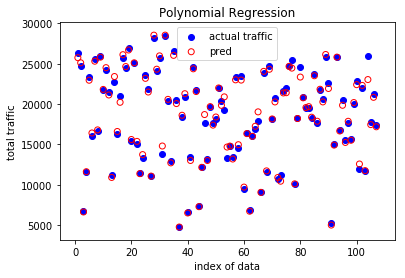

440015.92205483123
0.9863333945583099


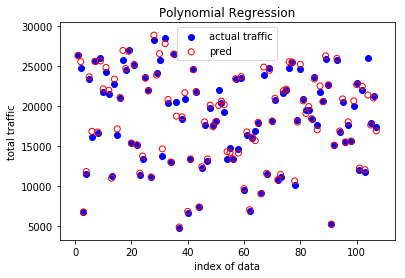

770408.502651666
0.9760716180780578


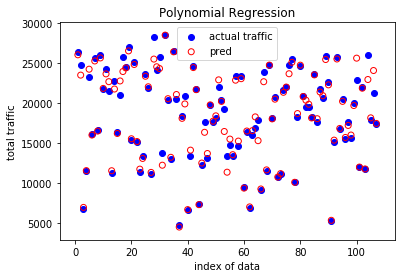

92344.16867183625
0.9971318507926138


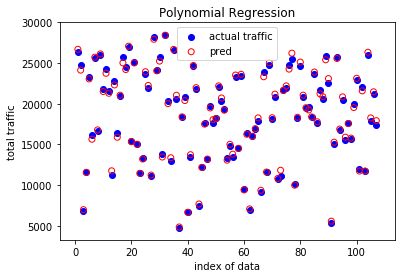

In [263]:
def prob1(x,num):    
    import matplotlib.pyplot as plt 
    from sklearn.metrics import	mean_squared_error,	r2_score
    X = x
    #y = df[['Brooklyn','Manhattan','Queensboro','Williamsburg']]
    y = df[['Total']]
        #Training and testing split, with 25% of the data reserved as the test set
    X = X.to_numpy()
    [X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.5, random_state=101)
    [X_train, trn_mean, trn_std] = normalize_train(X_train)
    X_test = normalize_test(X_test, trn_mean, trn_std)

    from sklearn.linear_model import LinearRegression 
    lin = LinearRegression() 

    lin.fit(X_train, y_train) 

    from sklearn.preprocessing import PolynomialFeatures 

    poly = PolynomialFeatures(degree =2) 
    X_poly = poly.fit_transform(X_train) 
    
    poly.fit(X_poly, y_train) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y_train) 
 
    print(mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test))))
    print(r2_score(y_test, lin2.predict(poly.fit_transform(X_test))))
    # Visualising the Polynomial Regression results 
    a=np.linspace(1, 107, num=107, retstep=True)
    a = a[0]
   # print(a,np.array(y))
   #print(np.shape(a))
  #  print(a)
    r = []
    for i in X_test:
        r.append(sum(i))
      
    plt.scatter(a, np.array(y_test), color = 'blue',label="actual traffic") 
   # plt.legend(['actual traffic'])
    
    plt.scatter(a, np.array(lin2.predict(poly.fit_transform(X_test))),marker='o',c='',edgecolors='r',label="pred") 
    #plt.plot(r, np.array(lin2.predict(poly.fit_transform(X_test))), color = 'red') 
    plt.legend()
    plt.title('Polynomial Regression') 
    plt.xlabel('index of data') 
    plt.ylabel('total traffic') 
    
    plt.show()
    #print(y,"\n")
    #print(lin2.predict(poly.fit_transform(X)),"\n\n")
    
    #plt.savefig(num+'.png')
        
prob1(df[['Brooklyn', 'Manhattan','Queensboro']],'1')
prob1(df[[ 'Manhattan','Queensboro','Williamsburg']],'2')
prob1(df[['Brooklyn', 'Queensboro','Williamsburg']],'3')
prob1(df[['Brooklyn', 'Manhattan','Williamsburg']],'4')
